In [1]:
!wget http://cb.lk/covid_19
!unzip covid_19

--2022-09-28 09:28:14--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-09-28 09:28:14--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-09-28 09:28:14--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-09-28 09:28:15

In [ ]:
#!unzip covid_19

In [2]:
import keras 

from keras.models import *
from keras.layers import *
from keras.preprocessing import image 
import PIL

In [3]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="SAME", activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64, (3,3), padding="SAME", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding="SAME", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

#model.add(Dense(1, activation='sigmoid'))

model.add(Dense(2, activation='softmax'))
#keras.losses.categorical_crossentropy

model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])


In [4]:
from keras.preprocessing.image import ImageDataGenerator
import os
main_dir = "/content/CovidDataset"
train_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_data = ImageDataGenerator(rescale=1./255)

train_dir = os.path.join(main_dir, "Train")
training_set = train_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_dir = os.path.join(main_dir, "Val")
test_set = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'

)





Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
results=model.fit_generator(
    training_set,
    steps_per_epoch=2,
    epochs=20,
    validation_data=test_set,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
2/2 [==============================] - 9s 4s/step - loss: 0.7465 - accuracy: 0.5156 - val_loss: 0.7298 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 5s 3s/step - loss: 0.8067 - accuracy: 0.5781 - val_loss: 0.6918 - val_accuracy: 0.5333
Epoch 3/20
2/2 [==============================] - 4s 3s/step - loss: 0.6806 - accuracy: 0.6250 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 4s 3s/step - loss: 0.6991 - accuracy: 0.4688 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 4s 3s/step - loss: 0.6826 - accuracy: 0.5938 - val_loss: 0.6891 - val_accuracy: 0.5167
Epoch 6/20
2/2 [==============================] - 5s 4s/step - loss: 0.6757 - accuracy: 0.6094 - val_loss: 0.6821 - val_accuracy: 0.5500
Epoch 7/20
2/2 [==============================] - 4s 3s/step - loss: 0.6210 - accuracy: 0.6875 - val_loss: 0.6467 - val_accuracy: 0.6333
Epoch 8/20
2/2 [=========================

In [ ]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

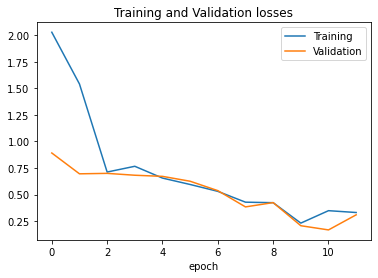

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

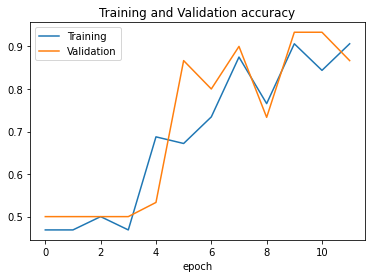

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_set)
print('test loss :{}   test accuracy :{}'.format(test_loss,test_acc))

2/2 [==============================] - 2s 888ms/step - loss: 0.3098 - accuracy: 0.8667
test loss :0.30975663661956787   test accuracy :0.8666666746139526
